In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import gaitFunctions
import combineClips
import plotClip
import os
import glob
import seaborn as sns
from scipy import stats
import cv2

def meanstdstr(vals):
    return str(np.round(np.mean(vals),2)) + ' ± ' + str(np.round(np.std(vals),2))

In [2]:
# plot colors and parameters
axis_fontsize=11
tick_fontsize=9

# colors for step kinematics
stance_color = '#5656ff'
swing_color = '#e1e813'
duty_color = '#4d4d4d'
ipsi_color = 'tab:red'
contra_color = 'tab:green'

# colors for legs
first_pair_color = '#b45eff' # lavender
first_pair_color_alt = '#661f99' # purple
second_pair_color = '#006f2a' # green
second_pair_color_alt = '#02db55' # light green
third_pair_color = '#ffd500' # yellow
third_pair_color_alt = '#fa9805' # orange
rear_leg_color = '#00b6eb'# light blue
rear_leg_color_alt = '#0010eb' # dark blue

# scatter marker size and alpha
marker_size = 10
marker_alpha = 0.7
marker_color = 'k'

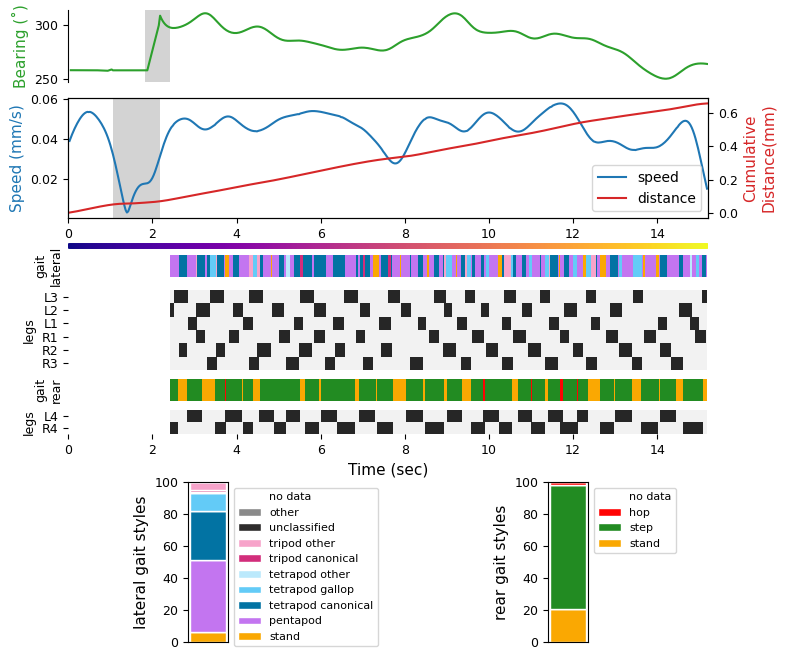

In [3]:
'''Quantification of speed, stops, turns'''
os.chdir('/Users/ianwoods/OneDrive - Ithaca College/2024_movement_disorder_paper/analyses_summaries/02 tracking_path')
f = plt.figure(1, figsize=(8,8))

excel_filename = 'iw_30Jan_tardigrade01_exemplaris_037-058.xlsx'
movie_file = 'iw_30Jan_tardigrade01_exemplaris_037-058.mov'
tracked_df = pd.read_excel(excel_filename, sheet_name='pathtracking', index_col=None)
path_stats = gaitFunctions.loadPathStats(movie_file)
scale = float(path_stats['scale'])
unit = path_stats['unit']
last_frame = tracked_df.times.values[-1]

# plot time (x) vs. speed (left y axis)
speedax = f.add_axes([0.1, 0.58, 0.8, 0.15])      
speedax, distax = plotClip.speedDistancePlot(speedax, tracked_df, scale, unit)
distax.yaxis.label.set_text('Cumulative\nDistance(mm)')
xtickpos = np.arange(0,int(last_frame),2)
speedax.set_xticks(xtickpos,[str(int(x)) for x in xtickpos])
speedax.set_xlabel('')
xlim = speedax.get_xlim()

# plot bearing changes on a separate axis above (a3)
bearingax = f.add_axes([0.1, 0.75, 0.8, 0.09])
bearingax = plotClip.bearingChangePlot(bearingax, tracked_df)
bearingax.set_xticks([])
bearingax.set_xlim(xlim)

# tiny axis to show time
timeribbonax = f.add_axes([0.1, 0.535, 0.8, 0.02])
timeribbonax = plotClip.timeRibbonPlot(timeribbonax, tracked_df)
timeribbonax.axis('off')
timeribbonax.set_xlim(xlim)

# adjust plot parameters
for ax in [speedax, distax, bearingax]:
    ax.yaxis.label.set_size(axis_fontsize)
    ax.xaxis.label.set_size(axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

os.chdir('/Users/ianwoods/OneDrive - Ithaca College/2024_movement_disorder_paper/analyses_summaries/03 step_kinematics')

excel_filename = 'iw_30Jan_tardigrade01_exemplaris_037-058.xlsx'
movie_file = 'iw_30Jan_tardigrade01_exemplaris_037-058.mov'

# plot the gait styles for lateral legs
gaits_ax = f.add_axes([0.1, 0.505, 0.8, 0.03])
gaits_ax = gaitFunctions.plotGaits(gaits_ax, excel_filename, 'lateral')
gaits_ax.set_xlim(xlim)

# plot the steps for the lateral legs
steps = f.add_axes([0.1, 0.39, 0.8, 0.1])
lateral_legs = gaitFunctions.get_leg_combos()[0]['legs_lateral']
steps = gaitFunctions.plotLegSet(steps, movie_file, lateral_legs)
steps.set_xlabel('')
steps.set_xticks([])
steps.set_xlim(xlim)

# plot the gait styles for rear legs
reargaits_ax = f.add_axes([0.1, 0.35, 0.8, 0.03])
reargaits_ax = gaitFunctions.plotGaits(reargaits_ax, excel_filename, 'rear')
reargaits_ax.set_xlim(xlim)

# plot the steps for the rear legs
rear_steps = f.add_axes([0.1, 0.31, 0.8, 0.03])
rear_legs = gaitFunctions.get_leg_combos()[0]['legs_4']
rear_steps = gaitFunctions.plotLegSet(rear_steps, movie_file, rear_legs)
rear_steps.set_xlim(xlim)
# rear_steps.set_xticks([])

# proportions and legend for gait styles: lateral
lateral_gait_proportions_ax = f.add_axes([0.25, 0.05, 0.05, 0.2])
lateral_gait_proportions_ax = gaitFunctions.gaitStylePercentagesPlot(lateral_gait_proportions_ax, 
                                                                      [excel_filename],
                                                                      'lateral')

# proportions and legend for gait styles: rear
rear_gait_proportions_ax = f.add_axes([0.7, 0.05, 0.05, 0.2])
rear_gait_proportions_ax = gaitFunctions.gaitStylePercentagesPlot(rear_gait_proportions_ax, 
                                                                      [excel_filename],
                                                                      'rear')
# adjust parameters and show plot
for ax in [steps, rear_steps, gaits_ax, reargaits_ax]:
    ax.yaxis.label.set_size(tick_fontsize)
    ax.xaxis.label.set_size(tick_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
for ax in [lateral_gait_proportions_ax,rear_gait_proportions_ax]:
    ax.yaxis.label.set_size(axis_fontsize)
    ax.xaxis.label.set_size(axis_fontsize)
    ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)
rear_steps.xaxis.label.set_size(axis_fontsize)
rear_steps.tick_params(axis='both', which='major', labelsize=tick_fontsize)

# show plot
plt.show()